## Test Notebook

In [89]:
library(ggplot2)
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
summary(mpg)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

In [4]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## Plotting using ggplot2

In [30]:
options(repr.plot.width=6, repr.plot.height=4)

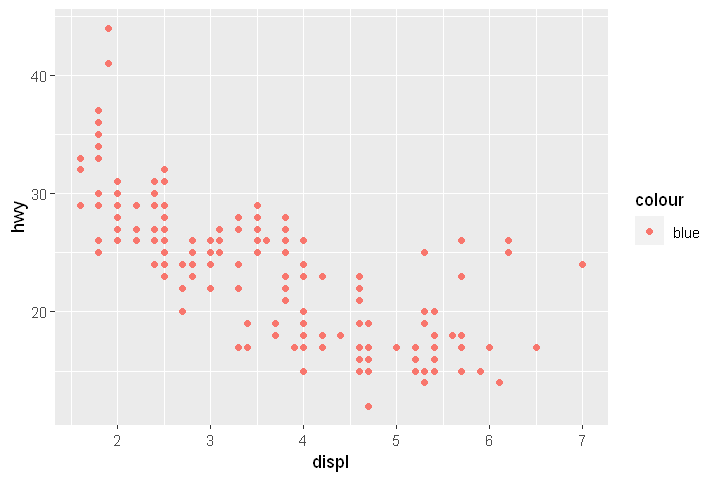

In [31]:

# data plotting
ggplot(mpg,aes(x=displ,y=hwy,color="blue"))+geom_point()

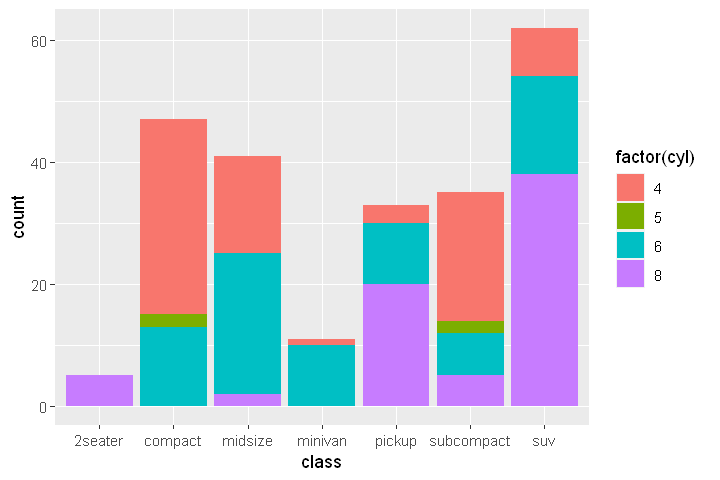

In [86]:
ggplot(mpg,aes(x=class,fill=factor(cyl)))+
                    geom_bar()+
                    scale_color_brewer(palette="Set2")

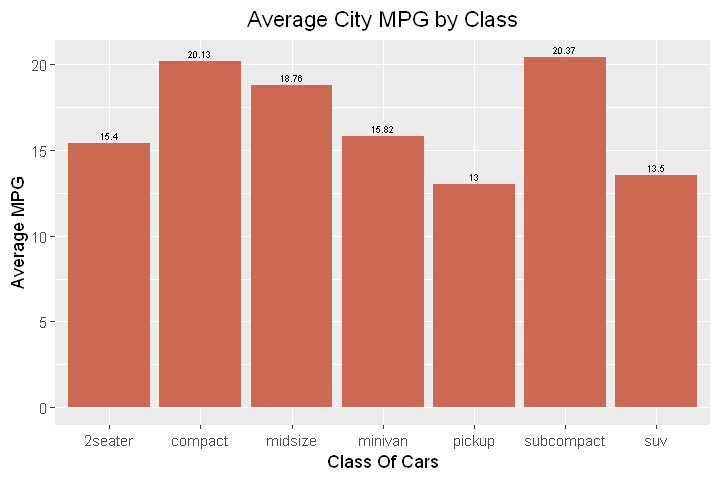

In [112]:
ggplot(mpg,aes(x = class, y =cty )) + 
            stat_summary(fun = "mean", geom = "bar",fill='#CD6853')+
                    scale_color_brewer(palette="Set2")+
            stat_summary(aes(label=round(..y..,2)), fun=mean, geom="text", size=2,
             vjust = -0.5)+
            labs(title='Average City MPG by Class',
                x='Class Of Cars',
                y='Average MPG')+
            theme(plot.title = element_text(hjust = 0.5))




## Performing Correlation


In [117]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


`geom_smooth()` using formula 'y ~ x'


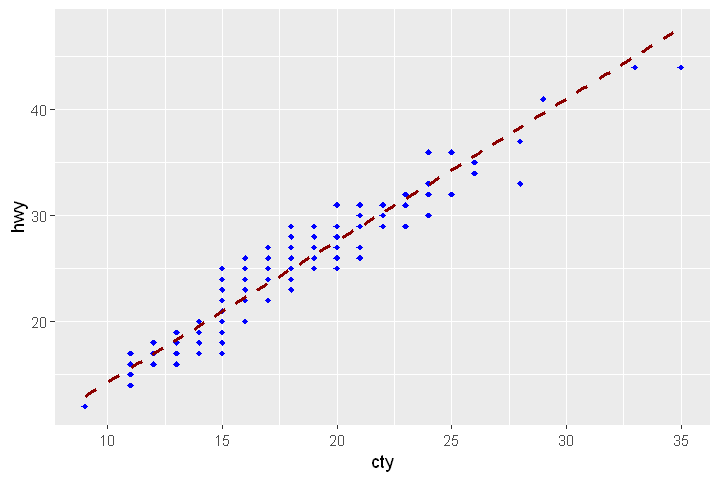

In [116]:
# correlation plot
ggplot(mpg, aes(x=cty, y=hwy)) + 
  geom_point(shape=18, color="blue")+
  geom_smooth(method=lm, se=FALSE, linetype="dashed",
             color="darkred",fill='blue')


In [69]:
corr_res =cor(mpg[,c('displ','cyl','cty','hwy')], method = c("pearson"))

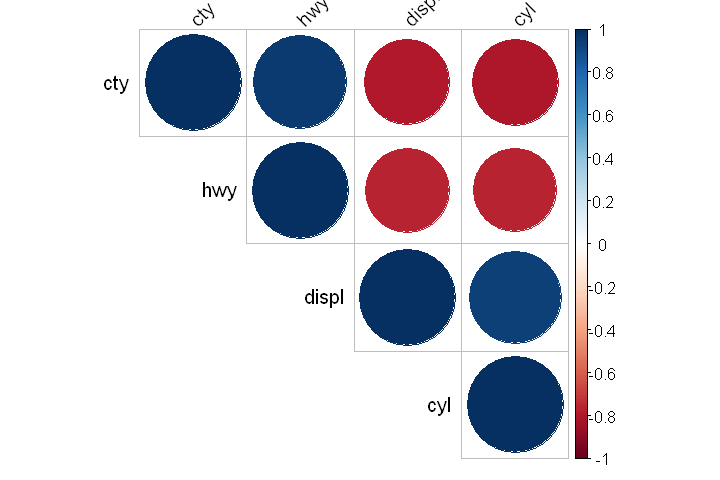

In [70]:
library(corrplot)
corrplot(corr_res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [72]:
corr_df <- as.data.frame(t(corr_res))

In [73]:
corr_df

,displ,cyl,cty,hwy
displ,1.0000000,0.9302271,-0.7985240,-0.7660200
cyl,0.9302271,1.0000000,-0.8057714,-0.7619124
cty,-0.7985240,-0.8057714,1.0000000,0.9559159
hwy,-0.7660200,-0.7619124,0.9559159,1.0000000


In [76]:
library(ggcorrplot)

Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"

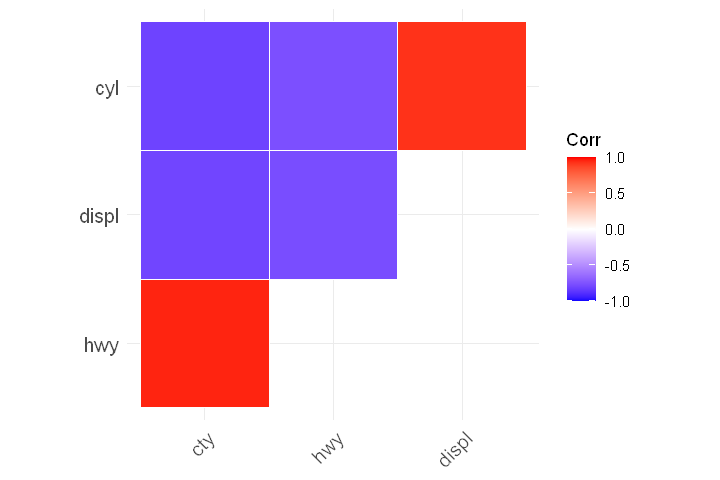

In [78]:
ggcorrplot(corr_res, hc.order = TRUE, type = "upper",
     outline.col = "white")

In [79]:
corr_df

,displ,cyl,cty,hwy
displ,1.0000000,0.9302271,-0.7985240,-0.7660200
cyl,0.9302271,1.0000000,-0.8057714,-0.7619124
cty,-0.7985240,-0.8057714,1.0000000,0.9559159
hwy,-0.7660200,-0.7619124,0.9559159,1.0000000


## performing regression in R

In [447]:
library(xgboost)
library(caret)
library(dplyr)
library(reshape2)
library(tidymodels)

### Splitting dataset



In [653]:
df <- mpg


In [654]:
## separating geartype from transmission
df <-df %>% 
tidyr::separate(trans,into=c("trans",'geartype'),sep='\\(')%>%
tidyr::separate(geartype,into=c("geartype"),extra='drop',sep='\\)')


In [655]:
head(df)

manufacturer,model,displ,year,cyl,trans,geartype,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto,l5,f,18,29,p,compact
audi,a4,1.8,1999,4,manual,m5,f,21,29,p,compact
audi,a4,2.0,2008,4,manual,m6,f,20,31,p,compact
audi,a4,2.0,2008,4,auto,av,f,21,30,p,compact
audi,a4,2.8,1999,6,auto,l5,f,16,26,p,compact
audi,a4,2.8,1999,6,manual,m5,f,18,26,p,compact


In [656]:
x_columns <- c("manufacturer","model","displ","year","cyl","trans","drv","fl","class",'cty')

In [657]:
# Random sample indexes
train_index <- sample(1:nrow(df), 0.8 * nrow(df))
test_index <- setdiff(1:nrow(df), train_index)

# Build X_train, y_train, X_test, y_test
X_train <- df[train_index,x_columns]
y_train <- df[train_index, "hwy"]

X_test <- df[test_index, x_columns]
y_test <- df[test_index, "hwy"]

## Performing Data processing


In [658]:
df_t_int <- select_if(df, is.numeric)
df_t_chr <- select_if(df, is.character)

In [659]:
# dummifying the data
dmy <- dummyVars("~.", data = df[,x_columns])


In [660]:
X_train <- predict(dmy, newdata = X_train)
X_test <- predict(dmy, newdata = X_test)

In [661]:
head(X_train)

manufactureraudi,manufacturerchevrolet,manufacturerdodge,manufacturerford,manufacturerhonda,manufacturerhyundai,manufacturerjeep,manufacturerlincoln,manufacturermercury,manufacturernissan,...,flp,flr,class2seater,classcompact,classmidsize,classminivan,classpickup,classsubcompact,classsuv,cty
0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,18
0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,16
1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,16
0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,21
0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,14
0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,11


In [662]:
X_train = data.matrix(X_train)
X_test = data.matrix(X_test)

In [663]:
y_train= as.matrix(y_train)
y_test = as.matrix(y_test)

In [664]:
xgb_train = xgb.DMatrix(data = X_train, label = y_train)
xgb_test = xgb.DMatrix(data = X_test, label = y_test)


## Model FItting

In [689]:
xgbc = xgboost(data = xgb_train, max.depth = 8, nrounds = 70,min.child_weight=2)
print(xgbc)

[1]	train-rmse:17.126881 
[2]	train-rmse:12.202215 
[3]	train-rmse:8.744465 
[4]	train-rmse:6.297843 
[5]	train-rmse:4.587144 
[6]	train-rmse:3.385869 
[7]	train-rmse:2.538289 
[8]	train-rmse:1.926643 
[9]	train-rmse:1.491506 
[10]	train-rmse:1.185894 
[11]	train-rmse:0.963444 
[12]	train-rmse:0.803918 
[13]	train-rmse:0.668958 
[14]	train-rmse:0.574435 
[15]	train-rmse:0.508938 
[16]	train-rmse:0.465579 
[17]	train-rmse:0.416121 
[18]	train-rmse:0.376307 
[19]	train-rmse:0.347699 
[20]	train-rmse:0.333774 
[21]	train-rmse:0.321125 
[22]	train-rmse:0.315174 
[23]	train-rmse:0.304354 
[24]	train-rmse:0.296492 
[25]	train-rmse:0.285399 
[26]	train-rmse:0.275537 
[27]	train-rmse:0.269232 
[28]	train-rmse:0.261621 
[29]	train-rmse:0.245459 
[30]	train-rmse:0.234087 
[31]	train-rmse:0.215114 
[32]	train-rmse:0.208581 
[33]	train-rmse:0.196307 
[34]	train-rmse:0.191141 
[35]	train-rmse:0.176471 
[36]	train-rmse:0.170932 
[37]	train-rmse:0.163510 
[38]	train-rmse:0.158627 
[39]	train-rmse:0.1

In [690]:
colnames(xgb_test) <- NULL


In [691]:
y_pred = predict(xgbc, xgb_test)

In [692]:
mse = mean((y_test - y_pred)^2)
mae = caret::MAE(y_test, y_pred)
rmse = caret::RMSE(y_test, y_pred)

cat("MSE: ", mse, "MAE: ", mae, " RMSE: ", rmse)


MSE:  108.7069 MAE:  8.734233  RMSE:  10.42626

In [693]:
out_data <-
  data.frame(
    idx = seq.int(nrow(y_test)),   
    hwy_true = y_test,
    hwy_pred = y_pred
    
    
  )

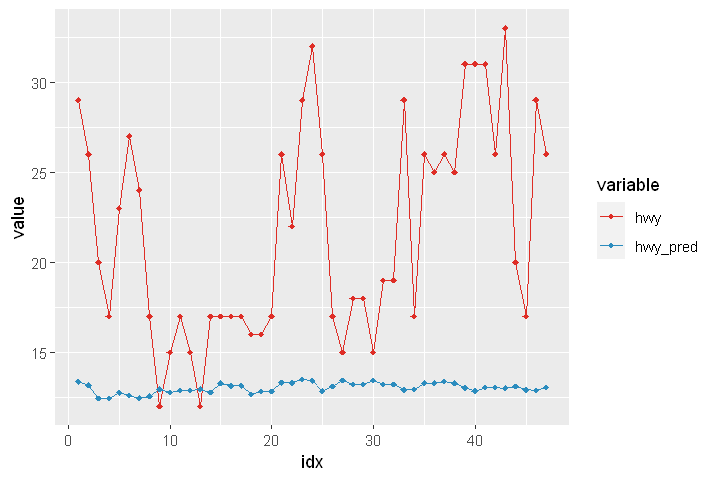

In [694]:
out_data_long <- melt(out_data, id='idx')  # convert to long format
ggplot(out_data_long,aes(idx,value,group= variable,color=variable))+
        geom_line()+
        geom_point(shape=18)+
        scale_color_manual(values=c( "#de2d26", "#2b8cbe", "#636363"))
        
       

## model tuning
1. Removed Cty to see if the model is good with City MPG
2. Removed model because that creates too many categories for a small dataset

In [717]:

# Random sample indexes
train_index <- sample(1:nrow(df), 0.8 * nrow(df))
test_index <- setdiff(1:nrow(df), train_index)

# Build train,test

train <- df[train_index,]
test <- df[train_index,]

In [718]:
# creating recipe

rec_obj <- 
    recipe(hwy ~. , data = train)%>%
    step_rm(cty,model) %>% 
    step_dummy(all_nominal(), -all_outcomes()) 


In [719]:
# Specify the model and the parameters to tune (parnsip)
model <-
  boost_tree(tree_depth = tune(), mtry = tune()) %>% 
  set_mode("regression") %>% 
  set_engine("xgboost")

In [720]:
?boost_tree

In [721]:
# Specify the resampling method (rsample)
splits <- vfold_cv(train, v = 5)


In [722]:
# Specify the metrics to optimize (yardstick)
metrics <- metric_set(yardstick::rmse)


In [723]:
# Specify the parameters grid (or you can use dials to automate your grid search)
grid <- expand_grid(tree_depth = c(4, 6, 8, 10),
                    mtry = c(2, 4,6, 8,10,12,14)) 

In [724]:
# Run each model (tune)
tuned <- tune_grid( model,
    rec_obj,
                      resamples = splits,
                   data = train,
                   grid = grid,
                   metrics = metrics,
                   
                   control = control_grid(verbose = FALSE))

Warning message:
"The `...` are not used in this function but one or more objects were passed: 'data'"! Fold1: model  1/28 (predictions): There are new levels in a factor: s4
! Fold1: model  2/28 (predictions): There are new levels in a factor: s4
! Fold1: model  3/28 (predictions): There are new levels in a factor: s4
! Fold1: model  4/28 (predictions): There are new levels in a factor: s4
! Fold1: model  5/28 (predictions): There are new levels in a factor: s4
! Fold1: model  6/28 (predictions): There are new levels in a factor: s4
! Fold1: model  7/28 (predictions): There are new levels in a factor: s4
! Fold1: model  8/28 (predictions): There are new levels in a factor: s4
! Fold1: model  9/28 (predictions): There are new levels in a factor: s4
! Fold1: model 10/28 (predictions): There are new levels in a factor: s4
! Fold1: model 11/28 (predictions): There are new levels in a factor: s4
! Fold1: model 12/28 (predictions): There are new levels in a factor: s4
! Fold1: model 13/28 (

In [725]:
# Check results
show_best(tuned)

mtry,tree_depth,.metric,.estimator,mean,n,std_err,.config
14,8,rmse,standard,2.320041,5,0.6239983,Model21
12,8,rmse,standard,2.327006,5,0.5820933,Model20
10,8,rmse,standard,2.343887,5,0.5646376,Model19
12,10,rmse,standard,2.347072,5,0.6094910,Model27
10,6,rmse,standard,2.393366,5,0.5599983,Model12


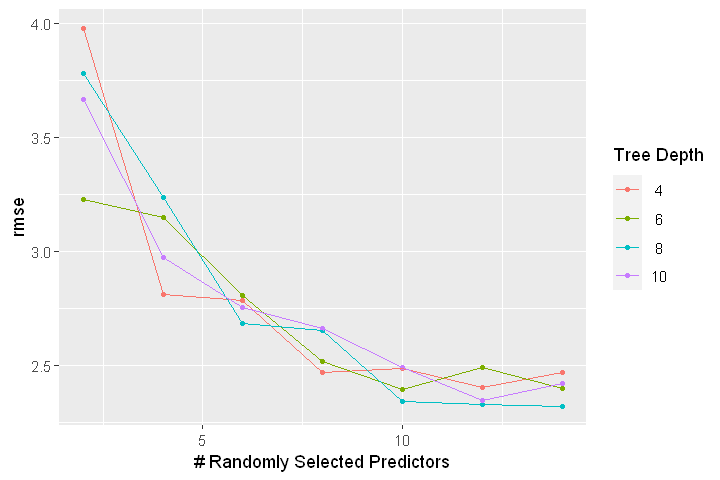

In [726]:
autoplot(tuned)

In [727]:
select_best(tuned)


mtry,tree_depth,.config
14,8,Model21


In [728]:
# Update model
tuned_model <- 
  model %>% 
  finalize_model(select_best(tuned)) %>% 
  fit(hwy ~ ., data = train)

In [729]:
test[c('hwy_pred')] <-predict(tuned_model,test)


In [730]:
out_data <- test[,c('hwy','hwy_pred')]


In [731]:
y_test <- as.matrix(out_data[,'hwy'])
y_pred <- as.matrix(out_data[,'hwy_pred'])
mse = mean((y_test - y_pred)^2)
mae = caret::MAE(y_test, y_pred)
rmse = caret::RMSE(y_test, y_pred)

cat("MSE: ", mse, "MAE: ", mae, " RMSE: ", rmse)


MSE:  1.132722 MAE:  0.8018964  RMSE:  1.064294

In [732]:
out_data[,'idx'] <- seq.int(nrow(test))

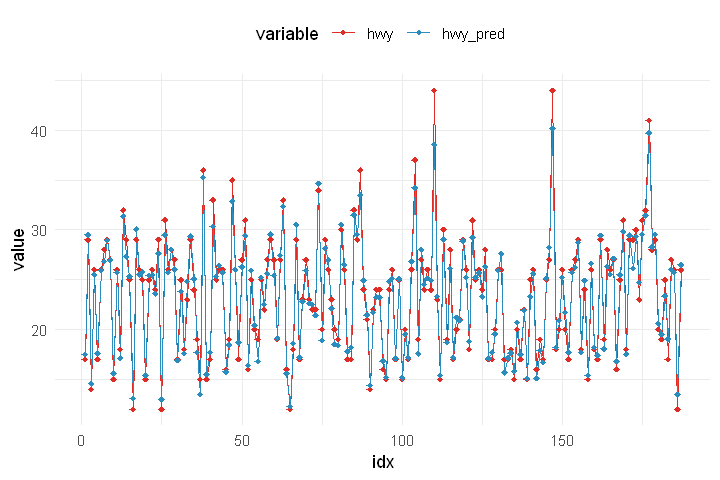

In [733]:
out_data_long <- melt(out_data, id='idx')  # convert to long format
ggplot(out_data_long,aes(idx,value,group= variable,color=variable))+
        geom_line()+
        geom_point(shape=18)+
        scale_color_manual(values=c( "#de2d26", "#2b8cbe", "#636363"))+
        theme_minimal() +
        
        theme(legend.position = "top")
        